<a href="https://colab.research.google.com/github/Jai-Keshav-Sharma/ML_from_scratch/blob/main/ANN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

from sklearn.metrics import classification_report
import seaborn as sns

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [46]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [47]:
X_train = X_train / 255
X_test = X_test / 255

In [48]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [51]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.3)

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7608 - loss: 0.7788 - val_accuracy: 0.9473 - val_loss: 0.1818
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9384 - loss: 0.2059 - val_accuracy: 0.9580 - val_loss: 0.1372
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9558 - loss: 0.1468 - val_accuracy: 0.9651 - val_loss: 0.1170
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9631 - loss: 0.1217 - val_accuracy: 0.9663 - val_loss: 0.1123
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9690 - loss: 0.0992 - val_accuracy: 0.9692 - val_loss: 0.1067
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9724 - loss: 0.0841 - val_accuracy: 0.9706 - val_loss: 0.1024
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9771 - loss: 0.0725 - val_accuracy: 0.9731 - val_loss: 0.0935
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9785 - loss: 0.0672 - val_accuracy: 0.

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}\tAccuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0876
Loss: 0.0764823630452156	Accuracy: 0.9775000214576721


In [53]:
prediction = model.predict(X_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.02710590e-06, 5.52088022e-06, 1.97966165e-05, ...,
        9.99350190e-01, 3.28431383e-06, 1.35718612e-04],
       [3.61009107e-08, 1.93919986e-05, 9.99973118e-01, ...,
        2.92528513e-09, 1.99447356e-07, 2.03719040e-13],
       [9.81959580e-09, 9.99966323e-01, 4.32825163e-06, ...,
        1.56610440e-05, 4.84770817e-06, 1.76318019e-06],
       ...,
       [3.41677844e-16, 6.31599573e-09, 6.97899795e-15, ...,
        1.81281629e-10, 1.24561255e-11, 5.73556402e-09],
       [3.47382344e-12, 1.17271678e-10, 1.85864413e-13, ...,
        1.07891182e-10, 9.12589897e-08, 1.37736711e-10],
       [4.60631255e-11, 1.01622573e-12, 7.67823739e-13, ...,
        2.30179763e-15, 3.26565901e-12, 1.80556348e-13]], dtype=float32)

In [54]:
prediction[0], np.argmax(prediction[0])

(array([1.0271059e-06, 5.5208802e-06, 1.9796616e-05, 4.8328572e-04,
        5.0281412e-10, 1.0432516e-06, 1.8355545e-10, 9.9935019e-01,
        3.2843138e-06, 1.3571861e-04], dtype=float32),
 np.int64(7))

In [55]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

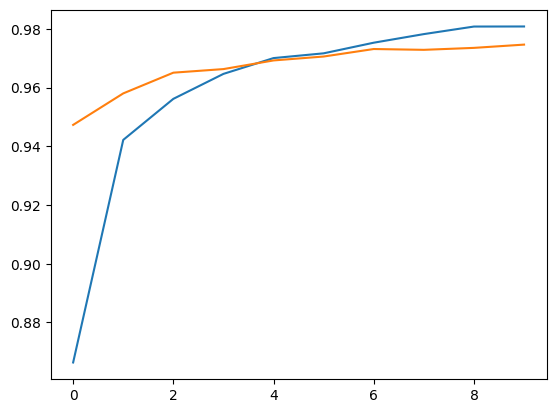

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

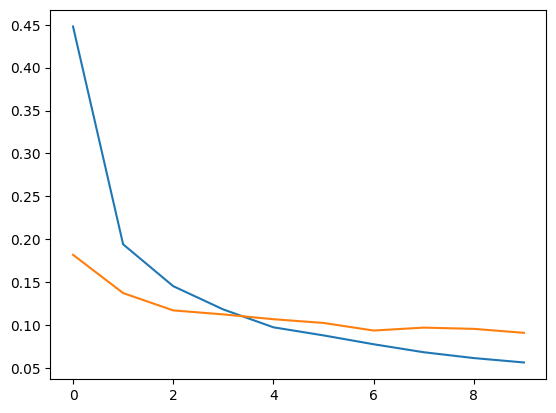

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])